#  Final Project: Etsy Marketplace Exploration

## Data Visualization and Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.tools.plotting import table

In [2]:
df = pd.read_csv("data_with_dummy.csv")

In [3]:
del df['Unnamed: 0']

In [4]:
del df['oops']

In [5]:
df.sample(3)

,review_date,shop,top,sub,review_month,season,fall,spring,summer,winter,accessories,bags-and-purses,books-movies-and-music,clothing,craft-supplies-and-tools,electronics-and-accessories,jewelry,shoes,weddings
34774,"Aug 6, 2016",FreshyFig,jewelry,bracelets,Aug,summer,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40507,"Jul 10, 2016",ArrowandBoard,jewelry,watches,Jul,summer,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73212,"May 1, 2016",BasketfulOfGrace,weddings,gifts-and-mementos,May,spring,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Plot Clustermap

In [6]:
sample_df = df[["review_date","season", "accessories", "bags-and-purses", "books-movies-and-music", "clothing", "craft-supplies-and-tools", "electronics-and-accessories", "jewelry", "shoes", "weddings"]]

In [7]:
s = sample_df.groupby(['season'], as_index=True).sum()

In [8]:
s = s.drop(s.index[[1]])

In [9]:
s

,accessories,bags-and-purses,books-movies-and-music,clothing,craft-supplies-and-tools,electronics-and-accessories,jewelry,shoes,weddings
season,,,,,,,,,
fall,495.0,984.0,204.0,78.0,1483.0,714.0,502.0,361.0,309.0
spring,1910.0,3454.0,308.0,534.0,5837.0,2992.0,2993.0,851.0,1739.0
summer,5992.0,6713.0,2631.0,3736.0,18385.0,5524.0,7807.0,1393.0,7643.0
winter,1292.0,2213.0,386.0,188.0,2859.0,1863.0,1499.0,548.0,602.0


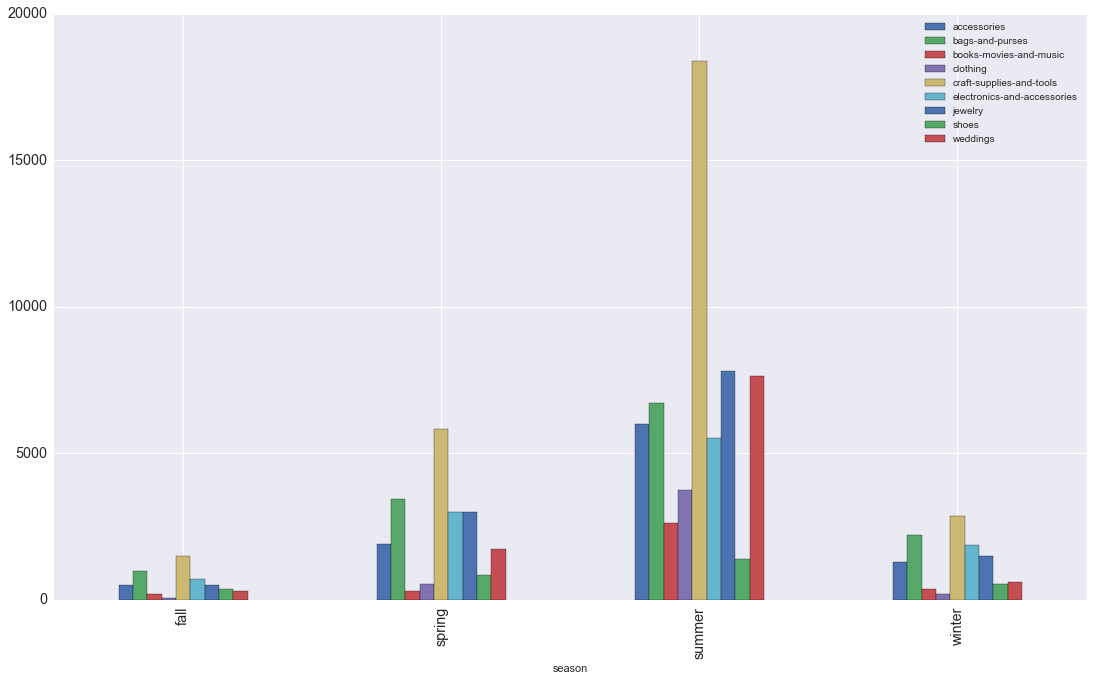

In [28]:
s.plot(kind='bar').tick_params(labelsize='large')
#s.legend(fontsize='large')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

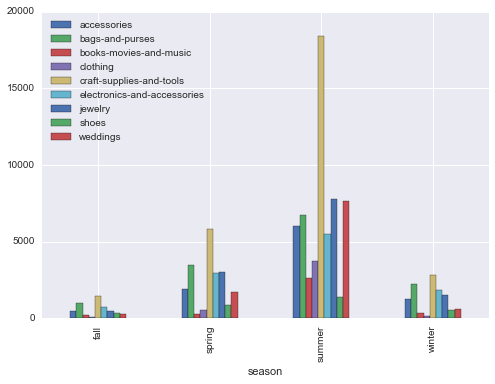

In [14]:
fig


Based on the heatmap below, it appears that not enough review pages were pulled. The data is disproportionately concentrated in the summer season because the review pages were pulled chronologically. In order to provide a more accurate analysis, you would have to pull all review pages from your sample shops or introduce a second sampling method for the review pages.

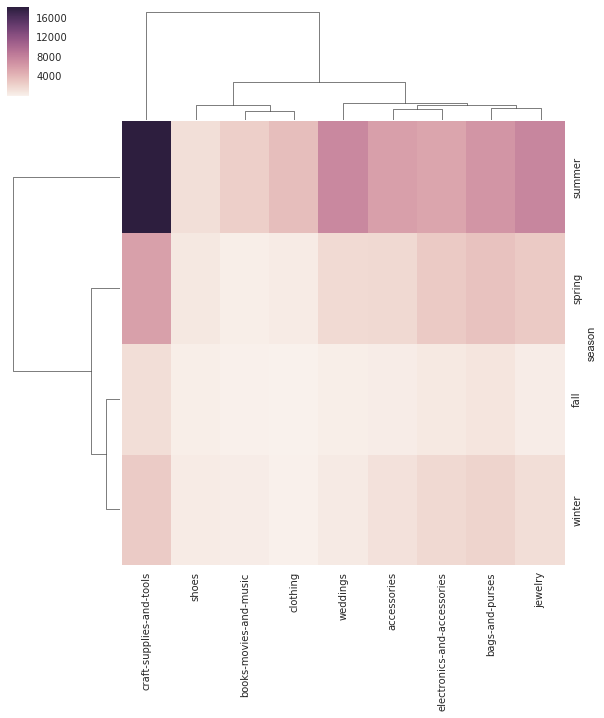

In [110]:
g = sns.clustermap(s)

In [95]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means.fit(s)
k_means_labels = k_means.labels_

In [96]:
k_means_labels

array([1, 1, 0, 1])

In [97]:
clusters = pd.DataFrame(k_means_labels,index=s.index,columns=["Cluster"])
s_with_cluster = pd.concat([s, clusters], axis=1)

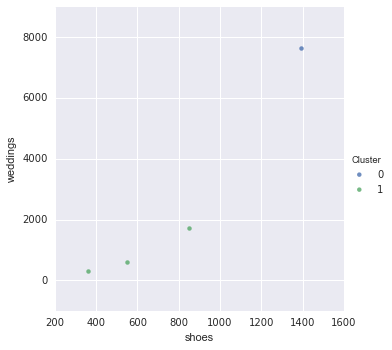

In [98]:
g = sns.lmplot(x="shoes", y="weddings", hue="Cluster", 
               fit_reg=False, 
               data=s_with_cluster)

### Logistic Regression Model

Logistic regression is a way to predict binary (two outcome) variables.
It is similar to linear regression because we entering predictor variables into our model, and finding coefficients for each of those variables that describe how a 1 unit increase in the variable relates to the outcome.

The key difference is that the outcome isn't continuous, but rather, our model is predicting the log odds of the outcome variable occurring. From the log odds of our outcome occuring, we can know specifically what the odds and probability of our outcome occuring is based on the level of our predictor variables.

#### A look at the wedding category

In [11]:
# sales in the wedding category vs. sales in other categories
df['weddings'].value_counts()

0.0    86775
1.0    10294
Name: weddings, dtype: int64

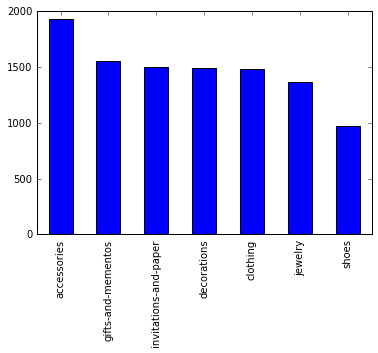

In [51]:
# Some of the sub categories in top category wedding
df['sub'][df.weddings == 1].value_counts().plot(kind='bar')

In [9]:
wedding_df = df[["weddings","winter","summer","spring","fall"]]

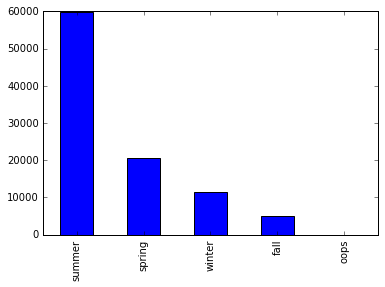

In [48]:
df.season.value_counts().plot(kind='bar')

In [17]:
# seasons in which wedding items were purchased
wedding_df[wedding_df.weddings == 1].sample(8)

,weddings,winter,summer,spring,fall
71654,1.0,0.0,1.0,0.0,0.0
72168,1.0,0.0,1.0,0.0,0.0
72080,1.0,0.0,1.0,0.0,0.0
11659,1.0,0.0,1.0,0.0,0.0
75189,1.0,1.0,0.0,0.0,0.0
77664,1.0,0.0,1.0,0.0,0.0
75443,1.0,0.0,1.0,0.0,0.0
77390,1.0,0.0,1.0,0.0,0.0


In [22]:
wedding_df.corr()

,weddings,winter,summer,spring,fall
weddings,1.000000,-0.063509,0.089362,-0.036608,-0.035148
winter,-0.063509,1.000000,-0.463470,-0.189911,-0.086383
summer,0.089362,-0.463470,1.000000,-0.658166,-0.299373
spring,-0.036608,-0.189911,-0.658166,1.000000,-0.122671
fall,-0.035148,-0.086383,-0.299373,-0.122671,1.000000


In [27]:
# percentage of sales in the summer for weddings vs. other categories
wedding_df.groupby("weddings")['summer'].mean()

weddings
0.0    0.601337
1.0    0.742471
Name: summer, dtype: float64

In [19]:
# percentage of sales in the winter for weddings vs. other categories
wedding_df.groupby("weddings")['winter'].mean()

weddings
0.0    0.125013
1.0    0.058481
Name: winter, dtype: float64

In [24]:
# percentage of sales in the spring for weddings vs. other categories
wedding_df.groupby("weddings")['spring'].mean()

weddings
0.0    0.217563
1.0    0.168933
Name: spring, dtype: float64

In [23]:
# percentage of sales in the fall for weddings vs. other categories
wedding_df.groupby("weddings")['fall'].mean()

weddings
0.0    0.055557
1.0    0.030017
Name: fall, dtype: float64

From looking at the group averages, we can tell that wedding items are more likely to sell in the summer than items in other categories. We can also tell that the best season to sell wedding items is in the summer: 74% of wedding items sell in the summer vs only 6% in the winter, 17% in the spring, and 3% in the fall.

In [40]:
#Odds of selling other items in summer
.601 / (1-.601)

1.5062656641604009

In [28]:
# Odds of selling wedding items in the summer vs odds of selling wedding items in any other season
.742 / (1 - .742)

2.875968992248062

In [29]:
# Odds of selling wedding items in any other season besides summer
.26 / (1-.26)

0.35135135135135137

In [30]:
#Create a logistic regression classifier object
#We use C=1000000 to not have our model penalize the predictor (Make it artificially smaller)
lm = LogisticRegression(C=100000)

In [32]:
#Set our X variable to be equal to the column that indicates whether the item sold was in the wedding category or not
#Outcome variable is likelihood of the item being sold in the summer 
X = wedding_df[['weddings']]
y= wedding_df['summer']

In [33]:
#fit logistic regression model
#model how our predictor variable relates to the log odds of the outcome variable
lm.fit(X,y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [34]:
#look at coefficient for summer
print zip(["summer"],lm.coef_[0])

[('summer', 0.64781505625561109)]


The coefficient is positive which means that the variable has a positive relationship with the outcome. Specifically, in the summer season, the log odds of selling a wedding item multiply by 0.6478 vs. other seasons

In [35]:
#exponentiate so that the result is in terms of odds, not log of odds
np.exp(lm.coef_[0])

array([ 1.91136005])

By exponentiating the coefficient, we can say the odds of selling a wedding item multiplies by 1.911 for the summer season vs. other seasons

In [39]:
#What are the odds of selling other items in summer?
print "Odds of selling other item categories in summer: %f" % np.exp(lm.intercept_ )

Odds of selling other item categories in summer: 1.508383


In [41]:
#What are the odds of selling wedding items in summer?
print "Odds of selling wedding items in summer: %f" % np.exp(lm.intercept_ + lm.coef_[0] )

Odds of selling wedding items in summer: 2.883063


In [100]:
odds_ratio= np.exp(lm.intercept_ + lm.coef_[0] ) / np.exp(lm.intercept_ )
print "Relative Increase of Odds of selling an item in the summer if wedding item vs. another category of item: %f" % odds_ratio

Relative Increase of Odds of selling an item in the summer if wedding item vs. another category of item: 1.911360


### Probablistic Model

The logistic regression model can give the specific probability of an item selling in the summer, if we know the item belongs in the wedding category.
For example, if we know that the item is in the wedding category, the model can predict the probability of that item selling in the summer using the "predict_proba" function.

In [43]:
#set our predictor to just be one row of a wedding item
observation = [1]

#tell the trained logistic regression object to predict the probability of that observation 
#belonging to class 0 and the probability of that observation belonging to class 1
predictions = lm.predict_proba(observation)
predictions

C:\Users\jishii\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.25752866,  0.74247134]])

Our model gives that item a 25% chance of selling in seasons other than summer, and a 74% chance of selling in the summer.
This probability corresponds to the data, where 74% of wedding items sold were in the summer

No need to regularlize model since there is only one predictor here and there should be no overfitting.